# Data Science Sample Code 
Candidate: Austin Willoughby <br>
Thank you for taking the time to view my code.  The below work represents a standard data cleaning, EDA, model building, visualization, and analysis.  Thank you!

<b>Pulling Dataset from GitHub<b>

In [2]:
%%bash
git clone https://github.com/airksenia/technical_screening

Cloning into 'technical_screening'...


<b>Examine the raw data and load into Pandas for cleaning<b>

In [827]:
f = open('technical_screening/order_records.log', 'r')
file_contents = f.read()
file_contents[:1000]

"0,{'order_id': 21000, 'package': {'weight': 326, 'volume': 62018, 'imperial_unit': 'false'},'service_line': 34}\n1,{'order_id': 21001, 'package': {'weight': 460, 'volume': 110592, 'imperial_unit': 'false'},'service_line': 34}\n2,{'order_id': 21002, 'package': {'weight': 500, 'volume': 1440, 'imperial_unit': 'false'},'service_line': 88}\n3,{'order_id': 21003, 'package': {'weight': 260, 'volume': 100700, 'imperial_unit': 'true'},'service_line': 34}\n4,{'order_id': 21004, 'package': {'weight': 168, 'volume': 20700, 'imperial_unit': 'true'},'service_line': 88}\n5,{'order_id': 21005, 'package': {'weight': 313, 'volume': 26400, 'imperial_unit': 'false'},'service_line': 65}\n6,{'order_id': 21006, 'package': {'weight': 92, 'volume': 81840, 'imperial_unit': 'false'},'service_line': 34}\n7,{'order_id': 21007, 'package': {'weight': 370, 'volume': 130036, 'imperial_unit': 'true'},'service_line': 34}\n8,{'order_id': 21008, 'package': {'weight': 220, 'volume': 33660, 'imperial_unit': 'true'},'servi

In [828]:
import pandas as pd

order_records = pd.read_csv('technical_screening/order_records.log', sep = 'random_value_TEGQH', header = None)
order_records.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,0
0,"0,{'order_id': 21000, 'package': {'weight': 32..."
1,"1,{'order_id': 21001, 'package': {'weight': 46..."
2,"2,{'order_id': 21002, 'package': {'weight': 50..."
3,"3,{'order_id': 21003, 'package': {'weight': 26..."
4,"4,{'order_id': 21004, 'package': {'weight': 16..."


In [829]:
type(order_records[0][0])

str

<b>Convert string to dictionary<b>

In [830]:
import ast
def str_to_dict(string):
    
    return ast.literal_eval(string)


order_records_dict = pd.DataFrame(order_records[0].apply(str_to_dict))
print('Column type pre to_list:',type(order_records_dict[0][0]))
print('Tuple item type pre to_list:',type(order_records_dict[0][0][1]))
# order_records_dict.head()


order_records_dict = pd.DataFrame(order_records_dict[0].to_list()).set_index(0)
# order_records_dict.head()
print('Column type post to_list:',type(order_records_dict[1][0]))
order_records_dict.head()

Column type pre to_list: <class 'tuple'>
Tuple item type pre to_list: <class 'dict'>
Column type post to_list: <class 'dict'>


,1
0,
0,"{'order_id': 21000, 'package': {'weight': 326,..."
1,"{'order_id': 21001, 'package': {'weight': 460,..."
2,"{'order_id': 21002, 'package': {'weight': 500,..."
3,"{'order_id': 21003, 'package': {'weight': 260,..."
4,"{'order_id': 21004, 'package': {'weight': 168,..."


<b>Check the dictionary shape.  "Packages" is the only feature with a nested dictionary.<b>

In [831]:
# check data shape
# dictionaries appear to be uniform
def dict_length(dictionary):

    for i in dictionary.keys():
        if type(dictionary[i]) == dict:
            if i != 'package':
                print(i)

    
    ##print(pd.Series(dict_list).unique())
    return len(dictionary), len(dictionary['package'])

print(order_records_dict[1].apply(dict_length).unique())
order_records_dict[1][1]

[(3, 3)]


{'order_id': 21001,
 'package': {'weight': 460, 'volume': 110592, 'imperial_unit': 'false'},
 'service_line': 34}

In [832]:
order_records_dict[1].head()

0
0    {'order_id': 21000, 'package': {'weight': 326,...
1    {'order_id': 21001, 'package': {'weight': 460,...
2    {'order_id': 21002, 'package': {'weight': 500,...
3    {'order_id': 21003, 'package': {'weight': 260,...
4    {'order_id': 21004, 'package': {'weight': 168,...
Name: 1, dtype: object

<b>Convert nested dictionary into MultiIndex Pandas DateFrame

In [833]:
def dict_to_df(dictionary):
    
    df_test = pd.DataFrame.from_dict({(i,j): dictionary[i][j] 
                           for i in dictionary.keys() if i == 'package'
                           for j in dictionary[i].keys()},
                       orient='index')

    df_test.index = pd.MultiIndex.from_tuples(df_test.index)
    df_test = df_test.T
    df_test['order_id'] = dictionary['order_id']
    df_test['service_line'] = dictionary['service_line']
    return df_test
    

In [834]:
df = order_records_dict[1].apply(dict_to_df)
# df = pd.concat(test123.values.tolist())
df = pd.concat(df.values.tolist())

df = df.reset_index().drop(['index'], axis = 1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


package                       order_id service_line
   weight  volume imperial_unit                      
0     326   62018         false    21000           34
1     460  110592         false    21001           34
2     500    1440         false    21002           88
3     260  100700          true    21003           34
4     168   20700          true    21004           88

In [835]:
#removed MultiIndex for easier data manipulaton
df.columns = ['weight','volume','imperial_unit','order_id','service_line']
df.head()

,weight,volume,imperial_unit,order_id,service_line
0,326,62018,false,21000,34
1,460,110592,false,21001,34
2,500,1440,false,21002,88
3,260,100700,true,21003,34
4,168,20700,true,21004,88


<b>Exploratory Data Analysis<b>

In [836]:
#Determine unique imperial_unit values
df['imperial_unit'].unique()

array(['false', 'true'], dtype=object)

In [837]:
#Determine unique service_line values
df.service_line.unique()

array([34, 88, 65, 64, 14, '65', '34'], dtype=object)

In [838]:
# Check for missing values
df.isnull().sum()

weight           0
volume           0
imperial_unit    0
order_id         0
service_line     0
dtype: int64

In [839]:
#Determine column data types
df.dtypes

weight           object
volume           object
imperial_unit    object
order_id          int64
service_line     object
dtype: object

In [801]:
#Dataset statistics
#Numerical values need to be reformatted
df.describe(include='all')

,weight,volume,imperial_unit,order_id,service_line
count,1000.0,1000.0,1000,1000.0,1000.0
unique,407.0,727.0,2,NaN,7.0
top,100.0,46656.0,false,NaN,34.0
freq,38.0,30.0,812,NaN,500.0
mean,NaN,NaN,NaN,21509.5,NaN
std,NaN,NaN,NaN,424.7,NaN
min,NaN,NaN,NaN,21000.0,NaN
25%,NaN,NaN,NaN,21249.8,NaN
50%,NaN,NaN,NaN,21500.5,NaN
75%,NaN,NaN,NaN,21750.2,NaN


In [802]:
#Reformat numerical values
df['weight'] = df['weight'].astype(int)
df['volume'] = df['volume'].astype(int)
df['service_line'] = df['service_line'].astype(int)


In [803]:
#Check new data types
df.dtypes

weight            int32
volume            int32
imperial_unit    object
order_id          int64
service_line      int32
dtype: object

In [804]:
#Reformatted dataset statistics
df.describe(include='all')

,weight,volume,imperial_unit,order_id,service_line
count,1000.0,1.0e+03,1000,1000.0,1000.0
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,false,NaN,NaN
freq,NaN,NaN,812,NaN,NaN
mean,418.2,7.9e+04,NaN,21509.5,49.4
std,1313.8,1.3e+05,NaN,424.7,16.2
min,2.0,1.0e+00,NaN,21000.0,14.0
25%,120.0,2.4e+04,NaN,21249.8,34.0
50%,200.0,4.4e+04,NaN,21500.5,34.0
75%,416.5,8.6e+04,NaN,21750.2,65.0


<b>Feature Engineering<b>

In [805]:
pd.set_option("display.precision", 1)

#convert metric units to imperial
lbs_per_Kg = 2.2
in3_per_cm3 = 0.0610237

df['weight_lbs'] = df['weight']
df['weight_lbs'] = df['weight'][df['imperial_unit']=='false'].apply(lambda x: x * lbs_per_Kg)
df.weight_lbs.fillna(df.weight, inplace=True)

df['volume_in3'] = df['volume']
df['volume_in3'] = df['volume'][df['imperial_unit']=='false'].apply(lambda x: x * in3_per_cm3)
df.volume_in3.fillna(df.volume, inplace=True)

df_imperial = df.drop(['weight','volume', 'imperial_unit'], axis=1)

In [806]:
df.head()

,weight,volume,imperial_unit,order_id,service_line,weight_lbs,volume_in3
0,326,62018,false,21000,34,717.2,3784.6
1,460,110592,false,21001,34,1012.0,6748.7
2,500,1440,false,21002,88,1100.0,87.9
3,260,100700,true,21003,34,260.0,100700.0
4,168,20700,true,21004,88,168.0,20700.0


In [807]:
#conversion successful
df_imperial.head()

,order_id,service_line,weight_lbs,volume_in3
0,21000,34,717.2,3784.6
1,21001,34,1012.0,6748.7
2,21002,88,1100.0,87.9
3,21003,34,260.0,100700.0
4,21004,88,168.0,20700.0


<b>Data Visualization<b>

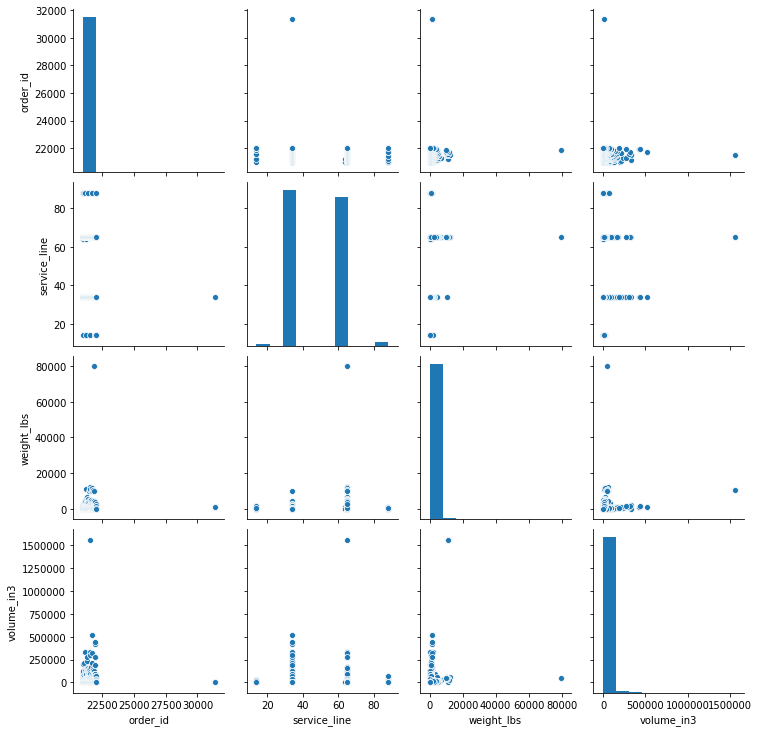

In [808]:
#pair plot visualization of all columns
sns.pairplot(df_imperial)
plt.show()

Text(0.5, 1.0, 'Weight (lbs)')

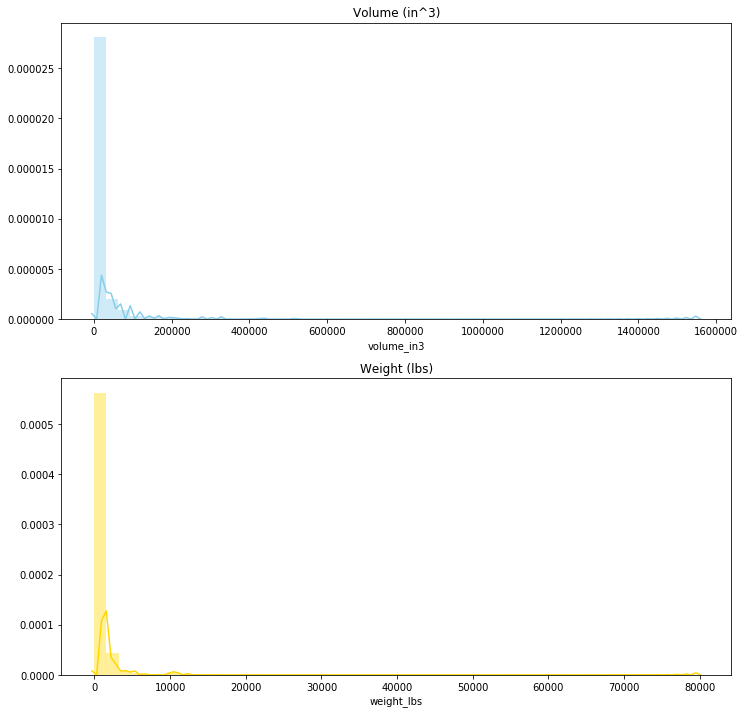

In [809]:
#View distribution of numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False)
sns.distplot( df_imperial["volume_in3"] , color="skyblue", ax=axes[0])
sns.distplot( df_imperial["weight_lbs"] , color="gold", ax=axes[1])
# axes[0].set_xlim(0,1000000)
axes[0].set_title('Volume (in^3)')
# axes[1].set_xlim(0,5000)
axes[1].set_title('Weight (lbs)')

Text(0, 0.5, 'Weight (lbs)')

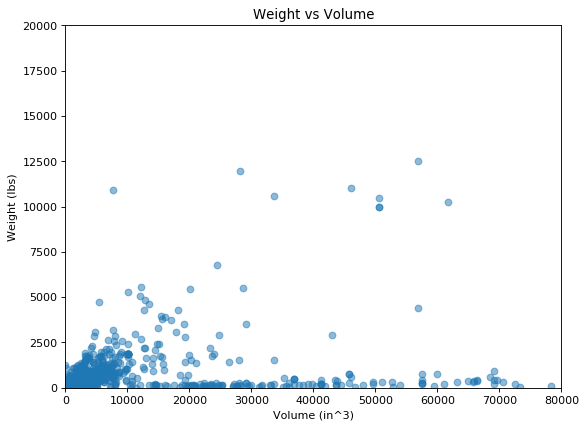

In [810]:
#scatter plot of numerical values
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df_imperial['volume_in3'],df_imperial['weight_lbs'], alpha=0.5)
plt.xlim(0,80000)
plt.ylim(0,20000)
plt.title('Weight vs Volume')
plt.xlabel('Volume (in^3)')
plt.ylabel('Weight (lbs)')

<b>Fitting a Simple Linear Regression<b>

In [811]:
import numpy as np
from sklearn.model_selection import train_test_split

#only weight and volume features used to fit model
y = df_imperial['weight_lbs']
X = df_imperial['volume_in3']

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [812]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [813]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X_train.values.reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train) #fit the model
pred = pd.DataFrame(reg.predict(X_test))

reg.score(X_test, y_test)

-0.04178157481731315

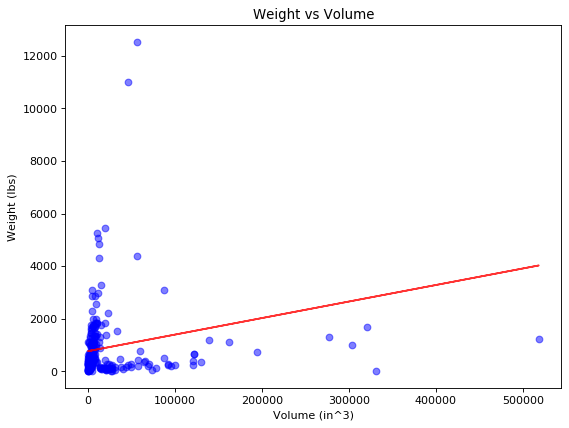

In [814]:
#Visualize linear regression.  R^2 value is only 0.004, thus the fit is poor
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test, y_test, color = "blue", alpha=0.5)
plt.plot(X_test, pred, color = "red", alpha = 0.8)
plt.title("Weight vs Volume")
plt.xlabel("Volume (in^3)")
plt.ylabel("Weight (lbs)")
plt.show()

<b>Predicting with Random Forest Regression<b>

In [815]:
#Random forest decision tree regression model fit to dataset
#weight and volume features used to fit model
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(max_depth=3, random_state=42)
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

#score model predictions
regr.score(pd.DataFrame(X_test), y_test)

-2.0417814238058924

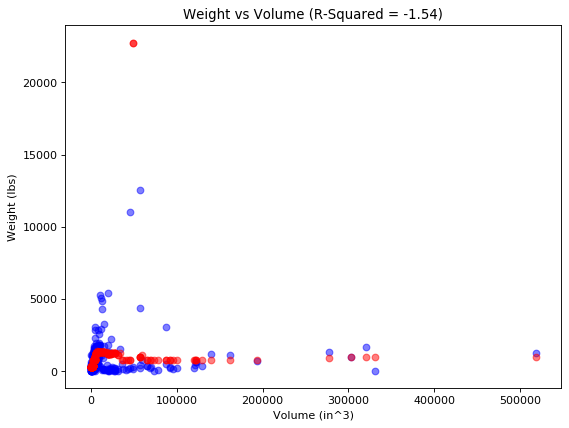

In [816]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test, y_test, color = "blue", alpha=0.5)
plt.scatter(X_test, pred, color = "red", alpha = 0.5)
plt.title("Weight vs Volume (R-Squared = -1.54)")
plt.xlabel("Volume (in^3)")
plt.ylabel("Weight (lbs)")
plt.show()

<b>Fitting with Multiple X Variables Random Forest Regression, and Grid Search<b>

In [823]:
y = df_imperial['weight_lbs']
X = df_imperial[['volume_in3','service_line']]  #X includes volume_in3 and service_line features
X = pd.concat([X, pd.get_dummies(df_imperial['service_line'])], axis=1)  #dummie variables created for service_line
X = X.drop(['service_line'], axis=1)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,volume_in3,14,34,64,65,88
703,7095.3,0,0,0,1,0
311,36864.0,0,0,0,1,0
722,1665.9,0,1,0,0,0
629,172800.0,0,0,0,1,0
0,3784.6,0,1,0,0,0


In [824]:
from sklearn.model_selection import GridSearchCV

#Use a grid search with 4fold cross validation to for parameter hypertuning
parameters = {'max_depth':[2,4,6,8], 'bootstrap':[False, True], 'min_weight_fraction_leaf':[0,0.005,0.015]}
regr2 = RandomForestRegressor(random_state = 42)
clf = GridSearchCV(regr2, parameters, verbose=1, cv=4, scoring='r2')
clf.fit(X_train, y_train)

#determine the highest scoring parameters
print("Best Parameters:",clf.best_params_,"Best Score:",clf.best_score_)


Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters: {'bootstrap': True, 'max_depth': 6, 'min_weight_fraction_leaf': 0.015} Best Score: -0.18947632465442352


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   10.3s finished


In [825]:
#tune the model with the highest scoring parameters
regr_best = RandomForestRegressor(bootstrap= True, max_depth= 6, min_weight_fraction_leaf= 0.015, random_state=42)

regr_best.fit(X_train, y_train)
pred_best = regr_best.predict(X_test)

#model score
regr_best.score(pd.DataFrame(X_test), y_test)

-0.1395701212545204

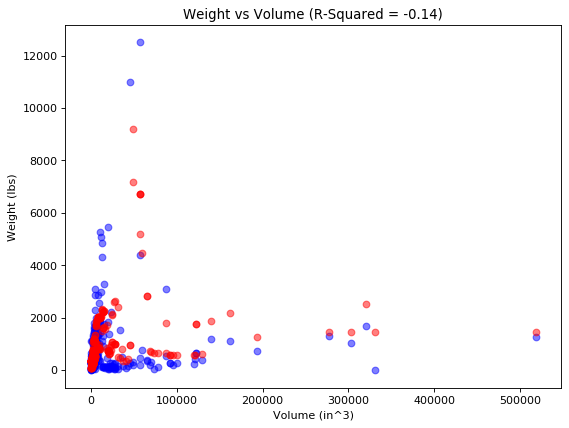

In [826]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test['volume_in3'], y_test, color = "blue", alpha=0.5)
plt.scatter(X_test['volume_in3'], pred_best, color = "red", alpha = 0.5)
plt.title("Weight vs Volume (R-Squared = -0.14)")
plt.xlabel("Volume (in^3)")
plt.ylabel("Weight (lbs)")
plt.show()

<b>Discussion:</b>

This dataset is composed of five variables with volume and weight being the most useful for numerical modeling.  With just the data given, it is difficult to predict a package's height using just its weight and service line.  Models generally yielded near-zero R-squared values, indicating that model accuracy is worse than the null hypothesis (i.e a horizontal line).  Additional features, such as package units (i.e. metric or imperial) could also be implemented into the models; however, were not in order to limit scope.  Further ML analysis could be completed, such as KNN or DBScan, for the determination of related dataset clusters.  Such clustering methods would require some form of data standardization; however, once again this was not done in order to limit scope.